In [1]:
### This script prepare external data(PC9, To) scatter plots and Venn diagrams for figure.py
import pandas as pd
from os.path import join
import pickle
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np
from matplotlib_venn import venn2, venn3
from scipy.stats import gaussian_kde

In [2]:
# settings
# plt.interactive(False)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def set_snsfont(s):
    sns.set(font_scale=s)
    sns.set_style("white")
set_snsfont(1.5)

In [4]:
### Load and read PC9 and To data
pc9_dir = '../out/21.0423 Lx PC9/L200only_reg_rf_boruta/anlyz'
pc9_standalone_dir = '../out/21.0720 Lx PC9Standalone/L200only_reg_rf_boruta/anlyz'
to_dir = '../out/21.0506 Lx To/L200only_reg_rf_boruta/anlyz'
to_org_dir = '../data/ceres_external/To'

df_pc9 = pickle.load(open(join(pc9_dir,'y_compr_ext.pkl'),'rb'))
df_pc9_standalone = pickle.load(open(join(pc9_standalone_dir,'y_compr_ext.pkl'),'rb'))
df_to = pickle.load(open(join(to_dir,'y_compr_ext.pkl'),'rb'))
df_to_org = pd.read_csv(join(to_org_dir,'ToCellCERES.csv'), index_col = 0) #original to file containing drug names

In [5]:
### Format data for plotting
# PC9 (Brunello library)
df_pc9 = pd.concat([df_pc9['actual'],df_pc9['predicted']], axis = 0).T
df_pc9.columns = ['actual','predicted']

# PC9 (L200 standalone library)
df_pc9_standalone = pd.concat([df_pc9_standalone['actual'],df_pc9_standalone['predicted']], axis = 0).T
df_pc9_standalone.columns = ['actual','predicted']

# To, scatter plot
# Drop DMSO and put all actual and predicted values together
df_to_actual = df_to['actual'].drop(0).melt(); df_to_predicted = df_to['predicted'].drop(0).melt()
df_to_scatter = pd.concat([df_to_actual['value'],df_to_predicted['value']],axis  =1)
df_to_scatter.columns = ['actual','predicted']

# To, Venn Diagram
df_to_venn = df_to
df_to_venn['actual'] = df_to['actual'].drop(0).T;df_to_venn['predicted'] = df_to['predicted'].drop(0).T
df_to_venn['actual'].columns = ['actual_'+ drug for drug in df_to_org.columns[1:]]
df_to_venn['predicted'].columns = ['predicted_'+ drug for drug in df_to_org.columns[1:]]
df_to_venn = pd.concat([df_to_venn['actual'],df_to_venn['predicted']], axis = 1)

In [6]:
# PC9, pred vs pred
df_pc9_pred = pd.concat([df_pc9['predicted'].T, df_pc9_standalone['predicted'].T], axis = 1)
df_pc9_pred.columns = ['standalone', 'brunello']
df_pc9_pred = df_pc9_pred.dropna()

***
### Scatter plot

In [7]:
# scatter plot by density method is from Stackoverflow forum #53865762 (answered by Joe Kington)

def plotDensity(df, title_txt, fname = None, 
                xcol = 'actual', ycol = 'predicted', xlab = 'Measured', ylab = 'Predicted'):
    x = df[xcol]
    y = df[ycol]
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)

    fig, ax = plt.subplots()
    ax.scatter(x, y, c=z, s=30, alpha=0.3)
    corr = pearsonr(x, y)[0]
    ax.text(0.05,0.9, f'rho = {corr:.3f}', transform=ax.transAxes)
    ax.set_title(title_txt)
    ax.set_xlabel(xlab);
    ax.set_ylabel(ylab);
    ax.set_ylim([-3,1.5])
    ax.set_xlim([-3,1.5])
    plt.tight_layout()

    if fname is not None:
        plt.savefig(fname)
        plt.close()

In [8]:
# # PC9
# ax = sns.scatterplot(x='actual', y='predicted', data = df_pc9, alpha=0.1, s=80, color='steelblue')
# corr = pearsonr(df_pc9['actual'], df_pc9['predicted'])[0];
# ax.text(0.05, 0.9, f'r = {corr:.3f}', transform=ax.transAxes)
# ax.set(xlabel='Measured', ylabel='Predicted', title='PC9', xlim=[-3,1], ylim=[-3,1]);
# # plt.savefig('PC9_exp_pred.pdf')

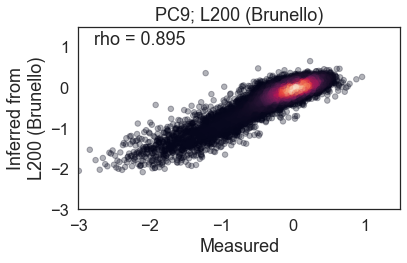

In [9]:
# PC9 (Brunello library)
plotDensity(df_pc9, 'PC9; L200 (Brunello)',
            xcol = 'actual', ycol = 'predicted', 
            xlab = 'Measured', 
            ylab = 'Inferred from\nL200 (Brunello)')

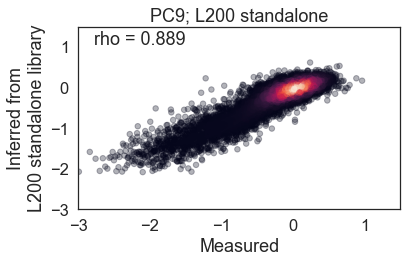

In [10]:
# PC9 (L200 standalone library)
plotDensity(df_pc9_standalone, 'PC9; L200 standalone',
            xcol = 'actual', ycol = 'predicted', 
            xlab = 'Measured', 
            ylab = 'Inferred from\nL200 standalone library')

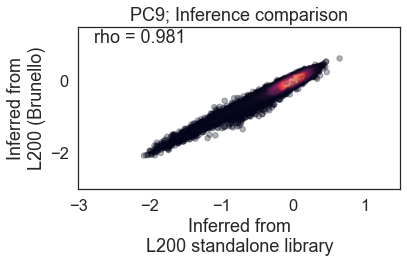

In [11]:
# PC9 inference compare
plotDensity(df_pc9_pred, 'PC9; Inference comparison',
            xcol = 'standalone', ycol = 'brunello', 
            xlab = 'Inferred from\nL200 standalone library', 
            ylab = 'Inferred from\nL200 (Brunello)')

In [12]:
# # To et al.
# ax = sns.scatterplot(x='actual', y='predicted', data = df_to_scatter, alpha=0.1, s=80, color='steelblue')
# corr = pearsonr(df_to_scatter['actual'], df_to_scatter['predicted'])[0];
# ax.text(0.05, 0.9, f'r = {corr:.3f}', transform=ax.transAxes)
# ax.set(xlabel='Measured', ylabel='Predicted', title='To et al.; 7 drugs', xlim=[-3,1.5], ylim=[-3,1.5]);
# # plt.savefig('PC9_exp_pred.pdf')

In [13]:
# To et al.
plotDensity(df_to_scatter, 'To et al.; 7 drugs')

***
### Venn diagram

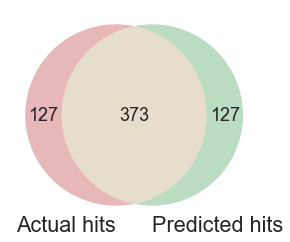

In [ ]:
# PC9
hits_n = 500
top_actual = df_pc9['actual'].T.sort_values().head(hits_n).index
top_predicted = df_pc9['predicted'].T.sort_values().head(hits_n).index
venn2([set(top_actual), set(top_predicted)], set_labels = ('Actual hits', 'Predicted hits'))
ax.set_title(f'PC9 (top {hits_n} hits)\nTotal counts');

In [ ]:
top_standalone = df_pc9_standalone['predicted'].T.sort_values().head(hits_n).index
top_brunello = df_pc9['predicted'].T.sort_values().head(hits_n).index
top_actual = df_pc9['actual'].T.sort_values().head(hits_n).index

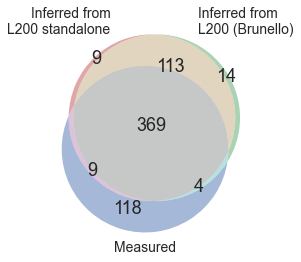

In [ ]:
fig, ax = plt.subplots()
out = venn3([set(top_standalone), set(top_brunello), set(top_actual)], 
      ('Inferred from\nL200 standalone','Inferred from\nL200 (Brunello)', 'Measured'), 
      alpha = 0.5)
for text in out.set_labels:
    text.set_fontsize(14)
plt.tight_layout()
plt.show()

In [ ]:
def get_venn_subset(df, hits_n, suffix = None):
    # get the hits from given dataframe

    suffix = '_' + suffix if suffix else ''

    top_actual = df['actual' + suffix].T.sort_values().head(hits_n).index
    top_predicted = df['predicted' + suffix].T.sort_values().head(hits_n).index
    intersect = len(set(top_actual).intersection(top_predicted))
    non_intersect = hits_n - intersect
    
    return(non_intersect, non_intersect, intersect)

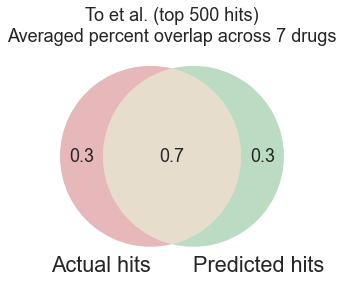

In [ ]:
# To, average percent overlap
hits_n = 500
ovp = []
for drug in df_to_org.columns[1:]:
    venn_subset = get_venn_subset(df_to_venn, hits_n, suffix = drug)
    ovp.append(venn_subset[2]/hits_n)
avg_intersect = round(sum(ovp)/7,1)
non_intersect = round(1 - avg_intersect,1)
venn_subset = (non_intersect, non_intersect, avg_intersect)
bar_subset= (1 - avg_intersect, avg_intersect, 1-avg_intersect)

fig, ax = plt.subplots()
venn2(subsets = venn_subset, set_labels = ('Actual hits', 'Predicted hits'))
ax.set_title(f'To et al. (top {hits_n} hits)\nAveraged percent overlap across 7 drugs');